In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


### Folders Name inside train dataset

- 0 - Angry
- 1 - Disgust
- 2 - Fear
- 3 - Happy
- 4 - Neutral
- 5 - Sad
- 6 - Surprise"

In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

2024-12-07 21:56:53.825917: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733587913.876920   25864 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733587913.892829   25864 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-07 21:56:54.015379: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# Check if GPUs are available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPUs are available: {[gpu.name for gpu in gpus]}")
else:
    print("No GPUs are available.")




Num GPUs Available:  1
GPUs are available: ['/physical_device:GPU:0']


In [3]:
img_array = cv2.imread("Image_Dataset/train/0/0.jpg")

In [4]:
img_array.shape # rgb

(48, 48, 3)

- when you load an image in OpenCV using cv2.imread(), the color channels are stored in BGR order, not RGB.

In [5]:
print(img_array)

[[[ 72  72  72]
  [ 78  78  78]
  [ 81  81  81]
  ...
  [ 52  52  52]
  [ 43  43  43]
  [ 40  40  40]]

 [[ 65  65  65]
  [ 62  62  62]
  [ 59  59  59]
  ...
  [ 55  55  55]
  [ 52  52  52]
  [ 45  45  45]]

 [[ 47  47  47]
  [ 42  42  42]
  [ 60  60  60]
  ...
  [ 47  47  47]
  [ 54  54  54]
  [ 49  49  49]]

 ...

 [[ 91  91  91]
  [ 65  65  65]
  [ 46  46  46]
  ...
  [ 74  74  74]
  [ 54  54  54]
  [ 43  43  43]]

 [[ 76  76  76]
  [ 80  80  80]
  [ 76  76  76]
  ...
  [108 108 108]
  [ 69  69  69]
  [ 46  46  46]]

 [[ 77  77  77]
  [ 74  74  74]
  [ 81  81  81]
  ...
  [105 105 105]
  [108 108 108]
  [ 82  82  82]]]


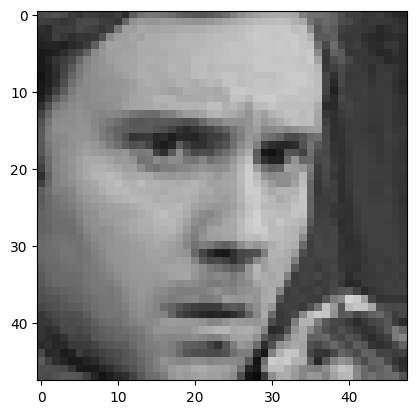

In [6]:
plt.imshow(img_array) # brg

In [7]:
data_directory = "Image_Dataset/train/" # Training Dataset

In [8]:
classes = ['0','1','2','3','4','5','6'] # list of classes [exact names of folders inside train folder]

## Converting All images into grayscale

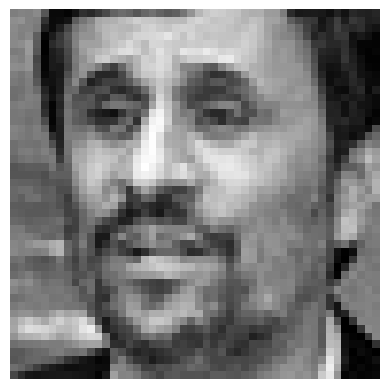

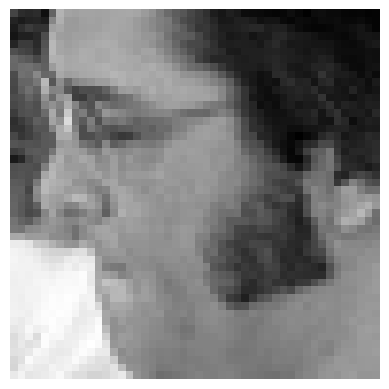

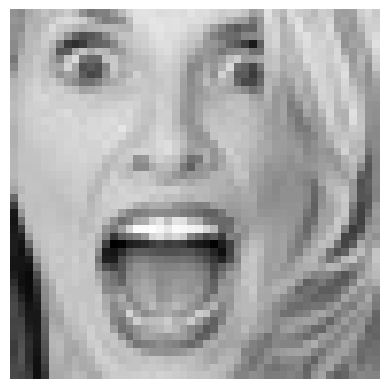

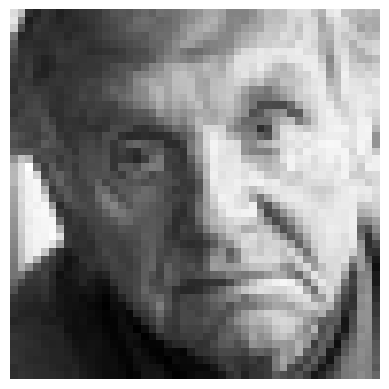

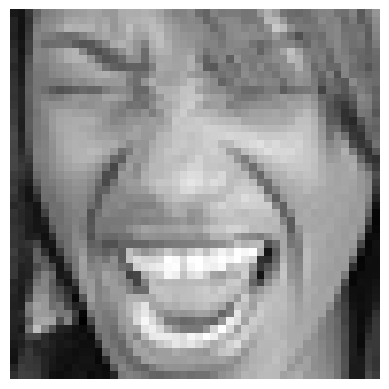

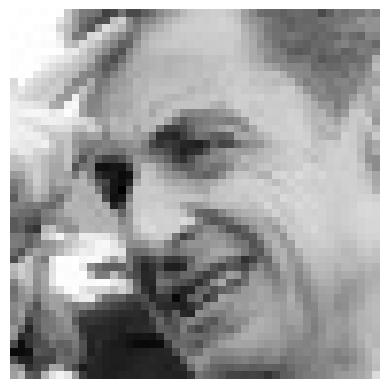

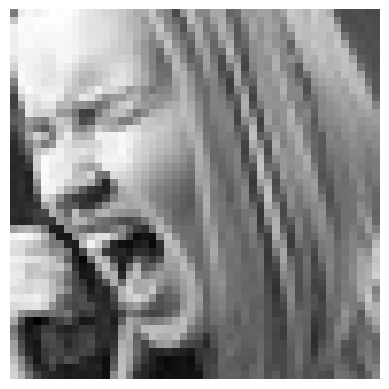

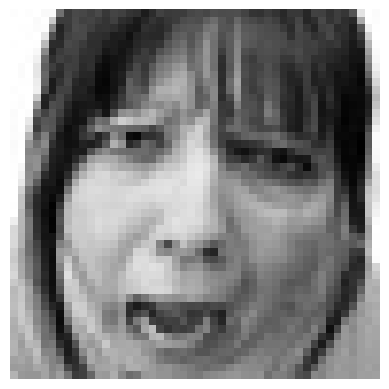

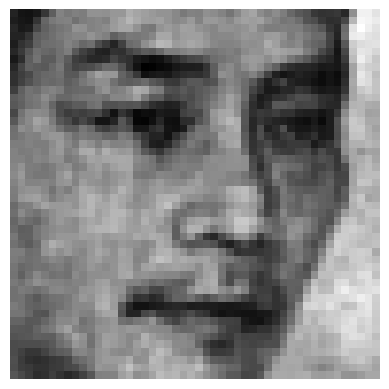

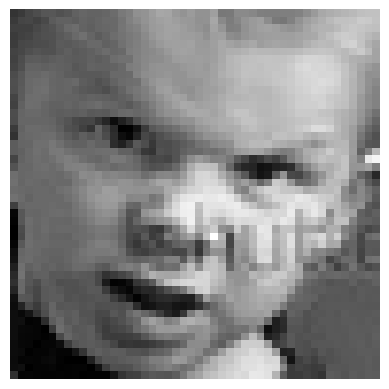

In [9]:
import os
import cv2
import matplotlib.pyplot as plt

# Assuming 'data_directory' and 'classes' are already defined
display_count = 10  # Number of images to display
count = 0

for category in classes: 
    path = os.path.join(data_directory, category)  # Path to the current category's folder

    for img in os.listdir(path): 
        img_path = os.path.join(path, img)  # Full path to the image
        img_array = cv2.imread(img_path)   # Read the image

        if img_array is None:  # Skip if the image is not readable
            continue

        # Convert the image to grayscale
        image_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

        # Display the grayscale image
        plt.imshow(image_array, cmap='gray')  # Use 'cmap' for grayscale display
        plt.axis('off')  # Turn off axes for better visualization
        plt.show()

        count += 1
        if count >= display_count:  # Stop after displaying 'display_count' images
            break
    if count >= display_count:
        break



In [10]:
image_array.shape 

(48, 48)

- `48 (Height)`: The number of pixels along the vertical axis (image height).
- `48 (Width)`: The number of pixels along the horizontal axis (image width).


## Read all images and convert them to an array

In [11]:
training_data = [] #data array

valid_extensions = ('.jpg', '.jpeg', '.png')

def creating_training_data():
    for category in classes:
        path = os.path.join(data_directory, category)
        class_num = classes.index(category)  # 0,1,2,3,4,5,6

        for img in os.listdir(path):
            if img.startswith('.ipynb'):  # Skip hidden files
                continue
            if not img.endswith(valid_extensions):  # Check for valid extensions
                continue
            try:
                if image_array is None:
                    continue
                    
                # Append image array and class number to training_data
                training_data.append([image_array, class_num])

            except Exception as e:
                print(f"Error processing image {img}: {e}")
        

In [12]:
creating_training_data()

In [13]:
print(len(training_data))

28821


In [14]:
image_array.shape

(48, 48)

In [15]:
import random

random.shuffle(training_data)

- Shuffling `training_data` randomly because we don't want our model to learn sequencially but learn dynamically and making training dataset robust .

In [16]:
# Convert the training data to a NumPy array
X = np.array([item[0] for item in training_data])  # Images
y = np.array([item[1] for item in training_data])  # Labels


In [17]:
X.shape 

(28821, 48, 48)

In [18]:
y.shape

(28821,)

In [19]:
y[0] # We shuffle labels randomly so output can come random 0 - 6

np.int64(6)

## Normalization

In [20]:
X = X.astype('float32') / 255.0


In [21]:
print(f"Min pixel value: {X.min()}, Max pixel value: {X.max()}")


Min pixel value: 0.0, Max pixel value: 0.8980392217636108


In [22]:
X.shape

(28821, 48, 48)

In [23]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


### Spliting the train and test dataset

In [24]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape

(23056, 48, 48)

### One-Hot encoding the labels/Targets

In [26]:
# One-hot encode the labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=len(classes))
y_test = to_categorical(y_test, num_classes=len(classes))

## Building Deep learning models for Training

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Rescaling, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

class_num = len(classes)  # Number of classes (emotions)

# Create the CNN model
model = Sequential()

# Preprocessing Layer (Normalize the input)
model.add(Rescaling(1.0 / 255, input_shape=(48, 48, 1)))

# Convolutional Layer 1
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))  # Increased filters
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Convolutional Layer 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))  # Increased filters
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Convolutional Layer 4 (Add more layers to capture complex features)
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

from tensorflow.keras.initializers import HeNormal

model.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_initializer=HeNormal()))

# Convolutional Layer 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Global Average Pooling to reduce the dimensionality
model.add(GlobalAveragePooling2D())

# Fully Connected Layers (Dense layers)
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.01)))  # Larger dense layer
model.add(Dropout(0.5))  # Increased dropout to avoid overfitting
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))  # Dropout to avoid overfitting
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Output Layer
model.add(Dense(class_num, activation='softmax'))



/home/namling/My_programs/Face and Emotion Recognition System (Project I)/myenv/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1733587935.841136   25864 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1226 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6


###  Compiling the Model

In [28]:
# Compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Display the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 64)       │       819,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 512)      │       295,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1, 1, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,886,407 (14.83 MB)

 Trainable params: 3,883,591 (14.81 MB)

 Non-trainable params: 2,816 (11.00 KB)

### Data Augmentation

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Reshape the data to have 4 dimensions (number_of_samples, height, width, channels)
X_train = X_train.reshape(-1, 48, 48, 1)  # For grayscale images (1 channel)

# # Initialize ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # the rotation range
    width_shift_range=0.1,  # the width shift
    height_shift_range=0.1,  # the height shift
    shear_range=0.1,  # shear
    zoom_range=0.1,  # zoom
    horizontal_flip=True,
    fill_mode='nearest'
 )

# # Fit the datagen on X_train
datagen.fit(X_train)


In [30]:
# #  # train generator that yields augmented data in batches

train_generator = datagen.flow(X_train, y_train, batch_size=32)



### Training the Model

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Reduce learning rate on plateau
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)

history = model.fit(train_generator, epochs=25, steps_per_epoch = len(X_train) // 32
 , validation_data=(X_test, y_test), callbacks=[lr_scheduler])


Epoch 1/25


/home/namling/My_programs/Face and Emotion Recognition System (Project I)/myenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733587960.144837   26029 service.cc:148] XLA service 0x755c3c0024e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733587960.152388   26029 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 2050, Compute Capability 8.6
2024-12-07 21:57:40.233780: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733587960.589983   26029 cuda_dnn.cc:529] Loaded cuDNN versio

  5/720 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.0965 - loss: 15.7976  

I0000 00:00:1733587967.235764   26029 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


719/720 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2240 - loss: 5.9910

2024-12-07 21:58:09.677642: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 53130240 exceeds 10% of free system memory.
2024-12-07 21:58:09.725843: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 53130240 exceeds 10% of free system memory.
2024-12-07 21:58:10.577325: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_247_0', 88 bytes spill stores, 120 bytes spill loads

2024-12-07 21:58:10.903655: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_247', 220 bytes spill stores, 220 bytes spill loads

2024-12-07 21:58:14.988790: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_247', 220 bytes spill stores, 220 bytes sp

720/720 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.2240 - loss: 5.9835 - val_accuracy: 0.2456 - val_loss: 1.8367 - learning_rate: 0.0010
Epoch 2/25
  1/720 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.2500 - loss: 1.8741

/home/namling/My_programs/Face and Emotion Recognition System (Project I)/myenv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2500 - loss: 1.8741 - val_accuracy: 0.2456 - val_loss: 1.8379 - learning_rate: 0.0010
Epoch 3/25
533/720 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.2479 - loss: 1.8270

In [33]:
# # # Train the model with class weights

# from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# history = model.fit( X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/25


2024-12-07 21:25:25.979713: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 212484096 exceeds 10% of free system memory.
2024-12-07 21:25:26.225472: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 212484096 exceeds 10% of free system memory.
I0000 00:00:1733586028.528945   21624 service.cc:148] XLA service 0x789978017b90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733586028.528977   21624 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 2050, Compute Capability 8.6
2024-12-07 21:25:28.579206: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733586028.860349   21624 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-07 21:25:28.991695: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 

 30/721 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2207 - loss: 4.6218

I0000 00:00:1733586034.073924   21624 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


721/721 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.2392 - loss: 2.4708 - val_accuracy: 0.2453 - val_loss: 1.8196
Epoch 2/25
721/721 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2476 - loss: 1.8186 - val_accuracy: 0.2453 - val_loss: 1.8149
Epoch 3/25
721/721 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2430 - loss: 1.8177 - val_accuracy: 0.2453 - val_loss: 1.8164
Epoch 4/25
721/721 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2488 - loss: 1.8152 - val_accuracy: 0.2453 - val_loss: 1.8127
Epoch 5/25
721/721 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2468 - loss: 1.8131 - val_accuracy: 0.2453 - val_loss: 1.8132
Epoch 6/25
721/721 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2510 - loss: 1.8119 - val_accuracy: 0.2453 - val_loss: 1.8113
Epoch 7/25
721/721 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2480 - loss: 1.8122 - val_accuracy: 0.2453 - val_loss: 1.8128
Epoch 8/25
721/721 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2492 - loss: 1.8152 - val_accuracy: 0.2453 - va

### Evaluating the model

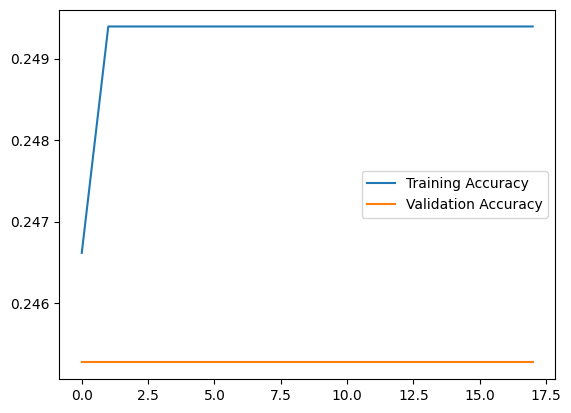

In [34]:
# Access accuracy and loss
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.show()


In [38]:
# Save the model after training
model.save('emotion_recognition_model_tf.keras')